In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import datetime as dt
from calendar import monthrange

def nearest_end_of_month(timestamp: dt.datetime) -> dt.datetime:
    if timestamp.day < 15:
        timestamp = timestamp - dt.timedelta(days=15)
    month_end = monthrange(timestamp.year, timestamp.month)[1]
    return timestamp.replace(day=month_end)

In [3]:
prices = pd.read_csv('data/weekly_prices.csv')
prices['timestamp'] = pd.to_datetime(prices.timestamp)
for col in prices.columns[2:]:
    prices[col] = pd.to_numeric(prices[col], 'coerce')
prices['adjustment_factor'] = prices['adjusted_close'] / prices['close']
prices = prices.set_index(['tick', 'timestamp']).sort_index()
prices

open      high       low   close  adjusted_close    volume  \
tick timestamp                                                                  
AAPL 1999-11-12   87.75   97.7300   86.7500   90.62          0.6858  25776200   
     1999-11-19   89.62   94.7500   88.0600   92.44          0.6996  13711000   
     1999-11-26   91.75   95.5000   88.5000   95.06          0.7194   9757600   
     1999-12-03   94.25  115.5600   93.2500  115.00          0.8703  28046300   
     1999-12-10  114.56  118.0000   99.0000  103.00          0.7795  25152800   
...                 ...       ...       ...     ...             ...       ...   
TSM  2023-11-24   99.90  100.5887   97.4700   97.83         97.3794  28279603   
     2023-12-01   97.42   99.7300   96.4200   98.55         98.0961  37487112   
     2023-12-08   97.05  100.3700   95.2501  100.35         99.8878  50432321   
     2023-12-15   99.57  104.7550   99.3700  102.54        102.5400  52303896   
     2023-12-18  102.84  103.3100  102.0800  102.93        102.9300   5660567   

                 dividend_amount  adjustment_factor  
tick timestamp                                       
AAPL 1999-11-12           0.0000           0.007568  
     1999-11-19           0.0000           0.007568  
     1999-11-26           0.0000           0.007568  
     1999-12-03           0.0000           0.007568  
     1999-12-10           0.0000           0.007568  
...                          ...                ...  
TSM  2023-11-24           0.0000           0.995394  
     2023-12-01           0.0000           0.995394  
     2023-12-08           0.0000           0.995394  
     2023-12-15           0.4787           1.000000  
     2023-12-18           0.0000           1.000000  

[10071 rows x 8 columns]

In [4]:
eps = pd.read_csv('data/quarterly_eps.csv')
eps['timestamp'] = pd.to_datetime(eps.timestamp)
eps['reported_Date'] = pd.to_datetime(eps.reported_Date)
for col in eps.columns[3:]:
    eps[col] = pd.to_numeric(eps[col], 'coerce')
#pd.to_datetime(eps.timestamp).dt.day.value_counts()
eps

,tick,timestamp,reported_Date,reported_EPS,estimated_EPS,surprise,surprise_Percentage
0,AAPL,2023-09-30,2023-11-02,1.46,1.39,0.07,5.0360
1,AAPL,2023-06-30,2023-08-03,1.26,1.19,0.07,5.8824
2,AAPL,2023-03-31,2023-05-04,1.52,1.43,0.09,6.2937
3,AAPL,2022-12-31,2023-02-02,1.88,1.94,-0.06,-3.0928
4,AAPL,2022-09-30,2022-10-27,1.29,1.27,0.02,1.5748
...,...,...,...,...,...,...,...
826,TSM,1999-06-30,1999-09-10,0.05,0.04,0.01,25.0000
827,TSM,1999-03-31,1999-04-21,0.04,0.02,0.02,100.0000
828,TSM,1998-12-31,1999-01-11,0.01,0.02,-0.01,-50.0000
829,TSM,1998-03-31,1998-04-27,0.04,0.04,0.00,0.0000


In [5]:
income = pd.read_csv('data/quarterly_income.csv')
income['timestamp'] = pd.to_datetime(income.timestamp)
income['timestamp'] = income.timestamp.apply(nearest_end_of_month)
for col in income.columns[2:]:
    income[col] = pd.to_numeric(income[col], 'coerce')
income['cost_Margin'] = income['total_Expenses'] / income['total_Revenue']
income

,tick,timestamp,net_Income,total_Revenue,total_Expenses,profit_Margin,cost_Margin
0,AAPL,2023-09-30,22956000000,88496000000,65540000000,0.259402,0.740598
1,AAPL,2023-06-30,19881000000,80799000000,60918000000,0.246055,0.753945
2,AAPL,2023-03-31,24160000000,94836000000,70676000000,0.254756,0.745244
3,AAPL,2022-12-31,29998000000,116151000000,86153000000,0.258267,0.741733
4,AAPL,2022-09-30,20721000000,89319000000,68598000000,0.231989,0.768011
...,...,...,...,...,...,...,...
177,TSM,2019-09-30,101069886000,293025712000,191955826000,0.344918,0.655082
178,TSM,2019-06-30,66764850000,241055305000,174290455000,0.276969,0.723031
179,TSM,2019-03-31,99984000000,218709901000,118725901000,0.457154,0.542846
180,TSM,2018-12-31,99984000000,289771000000,189787000000,0.345045,0.654955


In [6]:
quarters = pd.merge(eps, income, 'right', on=['tick', 'timestamp']).set_index(['tick', 'timestamp'])
quarters

reported_Date  reported_EPS  estimated_EPS  surprise  \
tick timestamp                                                         
AAPL 2023-09-30    2023-11-02          1.46           1.39      0.07   
     2023-06-30    2023-08-03          1.26           1.19      0.07   
     2023-03-31    2023-05-04          1.52           1.43      0.09   
     2022-12-31    2023-02-02          1.88           1.94     -0.06   
     2022-09-30    2022-10-27          1.29           1.27      0.02   
...                       ...           ...            ...       ...   
TSM  2019-09-30    2019-11-08          0.62           0.63     -0.01   
     2019-06-30    2019-07-25          0.41           0.41      0.00   
     2019-03-31    2019-04-19          0.39           0.38      0.01   
     2018-12-31    2019-01-21          0.63           0.63      0.00   
     2018-09-30    2018-10-18          0.56           0.56      0.00   

                 surprise_Percentage    net_Income  total_Revenue  \
tick timestamp                                                      
AAPL 2023-09-30               5.0360   22956000000    88496000000   
     2023-06-30               5.8824   19881000000    80799000000   
     2023-03-31               6.2937   24160000000    94836000000   
     2022-12-31              -3.0928   29998000000   116151000000   
     2022-09-30               1.5748   20721000000    89319000000   
...                              ...           ...            ...   
TSM  2019-09-30              -1.5873  101069886000   293025712000   
     2019-06-30               0.0000   66764850000   241055305000   
     2019-03-31               2.6316   99984000000   218709901000   
     2018-12-31               0.0000   99984000000   289771000000   
     2018-09-30               0.0000   89071628000   260333679000   

                 total_Expenses  profit_Margin  cost_Margin  
tick timestamp                                               
AAPL 2023-09-30     65540000000       0.259402     0.740598  
     2023-06-30     60918000000       0.246055     0.753945  
     2023-03-31     70676000000       0.254756     0.745244  
     2022-12-31     86153000000       0.258267     0.741733  
     2022-09-30     68598000000       0.231989     0.768011  
...                         ...            ...          ...  
TSM  2019-09-30    191955826000       0.344918     0.655082  
     2019-06-30    174290455000       0.276969     0.723031  
     2019-03-31    118725901000       0.457154     0.542846  
     2018-12-31    189787000000       0.345045     0.654955  
     2018-09-30    171262051000       0.342144     0.657856  

[182 rows x 10 columns]

In [7]:
quarters['surprise_Factor'] = (quarters['surprise_Percentage'] + 100) /100
quarters['surprise_Factor']

tick  timestamp 
AAPL  2023-09-30    1.050360
      2023-06-30    1.058824
      2023-03-31    1.062937
      2022-12-31    0.969072
      2022-09-30    1.015748
                      ...   
TSM   2019-09-30    0.984127
      2019-06-30    1.000000
      2019-03-31    1.026316
      2018-12-31    1.000000
      2018-09-30    1.000000
Name: surprise_Factor, Length: 182, dtype: float64

In [8]:
quarters['EPS_Net_Income_Ratio'] = quarters['reported_EPS'] / quarters['net_Income']
quarters

reported_Date  reported_EPS  estimated_EPS  surprise  \
tick timestamp                                                         
AAPL 2023-09-30    2023-11-02          1.46           1.39      0.07   
     2023-06-30    2023-08-03          1.26           1.19      0.07   
     2023-03-31    2023-05-04          1.52           1.43      0.09   
     2022-12-31    2023-02-02          1.88           1.94     -0.06   
     2022-09-30    2022-10-27          1.29           1.27      0.02   
...                       ...           ...            ...       ...   
TSM  2019-09-30    2019-11-08          0.62           0.63     -0.01   
     2019-06-30    2019-07-25          0.41           0.41      0.00   
     2019-03-31    2019-04-19          0.39           0.38      0.01   
     2018-12-31    2019-01-21          0.63           0.63      0.00   
     2018-09-30    2018-10-18          0.56           0.56      0.00   

                 surprise_Percentage    net_Income  total_Revenue  \
tick timestamp                                                      
AAPL 2023-09-30               5.0360   22956000000    88496000000   
     2023-06-30               5.8824   19881000000    80799000000   
     2023-03-31               6.2937   24160000000    94836000000   
     2022-12-31              -3.0928   29998000000   116151000000   
     2022-09-30               1.5748   20721000000    89319000000   
...                              ...           ...            ...   
TSM  2019-09-30              -1.5873  101069886000   293025712000   
     2019-06-30               0.0000   66764850000   241055305000   
     2019-03-31               2.6316   99984000000   218709901000   
     2018-12-31               0.0000   99984000000   289771000000   
     2018-09-30               0.0000   89071628000   260333679000   

                 total_Expenses  profit_Margin  cost_Margin  surprise_Factor  \
tick timestamp                                                                 
AAPL 2023-09-30     65540000000       0.259402     0.740598         1.050360   
     2023-06-30     60918000000       0.246055     0.753945         1.058824   
     2023-03-31     70676000000       0.254756     0.745244         1.062937   
     2022-12-31     86153000000       0.258267     0.741733         0.969072   
     2022-09-30     68598000000       0.231989     0.768011         1.015748   
...                         ...            ...          ...              ...   
TSM  2019-09-30    191955826000       0.344918     0.655082         0.984127   
     2019-06-30    174290455000       0.276969     0.723031         1.000000   
     2019-03-31    118725901000       0.457154     0.542846         1.026316   
     2018-12-31    189787000000       0.345045     0.654955         1.000000   
     2018-09-30    171262051000       0.342144     0.657856         1.000000   

                 EPS_Net_Income_Ratio  
tick timestamp                         
AAPL 2023-09-30          6.359993e-11  
     2023-06-30          6.337709e-11  
     2023-03-31          6.291391e-11  
     2022-12-31          6.267084e-11  
     2022-09-30          6.225568e-11  
...                               ...  
TSM  2019-09-30          6.134369e-12  
     2019-06-30          6.140956e-12  
     2019-03-31          3.900624e-12  
     2018-12-31          6.301008e-12  
     2018-09-30          6.287075e-12  

[182 rows x 12 columns]

In [9]:
quarters['reported_RPS'] = quarters['total_Revenue'] * quarters['EPS_Net_Income_Ratio']
quarters

reported_Date  reported_EPS  estimated_EPS  surprise  \
tick timestamp                                                         
AAPL 2023-09-30    2023-11-02          1.46           1.39      0.07   
     2023-06-30    2023-08-03          1.26           1.19      0.07   
     2023-03-31    2023-05-04          1.52           1.43      0.09   
     2022-12-31    2023-02-02          1.88           1.94     -0.06   
     2022-09-30    2022-10-27          1.29           1.27      0.02   
...                       ...           ...            ...       ...   
TSM  2019-09-30    2019-11-08          0.62           0.63     -0.01   
     2019-06-30    2019-07-25          0.41           0.41      0.00   
     2019-03-31    2019-04-19          0.39           0.38      0.01   
     2018-12-31    2019-01-21          0.63           0.63      0.00   
     2018-09-30    2018-10-18          0.56           0.56      0.00   

                 surprise_Percentage    net_Income  total_Revenue  \
tick timestamp                                                      
AAPL 2023-09-30               5.0360   22956000000    88496000000   
     2023-06-30               5.8824   19881000000    80799000000   
     2023-03-31               6.2937   24160000000    94836000000   
     2022-12-31              -3.0928   29998000000   116151000000   
     2022-09-30               1.5748   20721000000    89319000000   
...                              ...           ...            ...   
TSM  2019-09-30              -1.5873  101069886000   293025712000   
     2019-06-30               0.0000   66764850000   241055305000   
     2019-03-31               2.6316   99984000000   218709901000   
     2018-12-31               0.0000   99984000000   289771000000   
     2018-09-30               0.0000   89071628000   260333679000   

                 total_Expenses  profit_Margin  cost_Margin  surprise_Factor  \
tick timestamp                                                                 
AAPL 2023-09-30     65540000000       0.259402     0.740598         1.050360   
     2023-06-30     60918000000       0.246055     0.753945         1.058824   
     2023-03-31     70676000000       0.254756     0.745244         1.062937   
     2022-12-31     86153000000       0.258267     0.741733         0.969072   
     2022-09-30     68598000000       0.231989     0.768011         1.015748   
...                         ...            ...          ...              ...   
TSM  2019-09-30    191955826000       0.344918     0.655082         0.984127   
     2019-06-30    174290455000       0.276969     0.723031         1.000000   
     2019-03-31    118725901000       0.457154     0.542846         1.026316   
     2018-12-31    189787000000       0.345045     0.654955         1.000000   
     2018-09-30    171262051000       0.342144     0.657856         1.000000   

                 EPS_Net_Income_Ratio  reported_RPS  
tick timestamp                                       
AAPL 2023-09-30          6.359993e-11      5.628339  
     2023-06-30          6.337709e-11      5.120806  
     2023-03-31          6.291391e-11      5.966503  
     2022-12-31          6.267084e-11      7.279281  
     2022-09-30          6.225568e-11      5.560615  
...                               ...           ...  
TSM  2019-09-30          6.134369e-12      1.797528  
     2019-06-30          6.140956e-12      1.480310  
     2019-03-31          3.900624e-12      0.853105  
     2018-12-31          6.301008e-12      1.825849  
     2018-09-30          6.287075e-12      1.636737  

[182 rows x 13 columns]

In [10]:
quarters = quarters[['reported_RPS', 'cost_Margin']]
quarters

reported_RPS  cost_Margin
tick timestamp                            
AAPL 2023-09-30      5.628339     0.740598
     2023-06-30      5.120806     0.753945
     2023-03-31      5.966503     0.745244
     2022-12-31      7.279281     0.741733
     2022-09-30      5.560615     0.768011
...                       ...          ...
TSM  2019-09-30      1.797528     0.655082
     2019-06-30      1.480310     0.723031
     2019-03-31      0.853105     0.542846
     2018-12-31      1.825849     0.654955
     2018-09-30      1.636737     0.657856

[182 rows x 2 columns]

In [11]:
quarters_window = pd.DataFrame(quarters)
shifted_quarters = [ 
    quarters.sort_index()
    .groupby(level=0)
    .shift(offset)
    .rename(columns = lambda x: f'{x}_Q{offset}') 
    for offset in range(1, 4)
]
shifted_quarters = pd.concat(shifted_quarters, axis='columns', join='outer')
quarters_window = pd.merge(quarters_window, shifted_quarters, 'outer', left_index=True, right_index=True)

In [12]:
prices

open      high       low   close  adjusted_close    volume  \
tick timestamp                                                                  
AAPL 1999-11-12   87.75   97.7300   86.7500   90.62          0.6858  25776200   
     1999-11-19   89.62   94.7500   88.0600   92.44          0.6996  13711000   
     1999-11-26   91.75   95.5000   88.5000   95.06          0.7194   9757600   
     1999-12-03   94.25  115.5600   93.2500  115.00          0.8703  28046300   
     1999-12-10  114.56  118.0000   99.0000  103.00          0.7795  25152800   
...                 ...       ...       ...     ...             ...       ...   
TSM  2023-11-24   99.90  100.5887   97.4700   97.83         97.3794  28279603   
     2023-12-01   97.42   99.7300   96.4200   98.55         98.0961  37487112   
     2023-12-08   97.05  100.3700   95.2501  100.35         99.8878  50432321   
     2023-12-15   99.57  104.7550   99.3700  102.54        102.5400  52303896   
     2023-12-18  102.84  103.3100  102.0800  102.93        102.9300   5660567   

                 dividend_amount  adjustment_factor  
tick timestamp                                       
AAPL 1999-11-12           0.0000           0.007568  
     1999-11-19           0.0000           0.007568  
     1999-11-26           0.0000           0.007568  
     1999-12-03           0.0000           0.007568  
     1999-12-10           0.0000           0.007568  
...                          ...                ...  
TSM  2023-11-24           0.0000           0.995394  
     2023-12-01           0.0000           0.995394  
     2023-12-08           0.0000           0.995394  
     2023-12-15           0.4787           1.000000  
     2023-12-18           0.0000           1.000000  

[10071 rows x 8 columns]

In [87]:
#pd.set_option('display.max_rows', 32)
final_df = pd.merge(prices[['adjusted_close']], quarters_window, left_index=True, right_index=True, how='outer').groupby(level=0).ffill().dropna()
final_df.rename(columns={
    'reported_RPS': 'reported_RPS_Q0', 
    'cost_Margin': 'cost_Margin_Q0'
}, inplace=True)
for quarter in range(1, 4):
    final_df[f'reported_RPS_Q{quarter}'] = final_df[f'reported_RPS_Q{quarter-1}'] / final_df[f'reported_RPS_Q{quarter}']
    final_df[f'cost_Margin_Q{quarter}'] = final_df[f'cost_Margin_Q{quarter-1}'] / final_df[f'cost_Margin_Q{quarter}']
final_df['revenue_Yield'] = final_df['reported_RPS_Q0'] / final_df['adjusted_close']
final_df['returns'] = final_df['adjusted_close'].groupby(level=0).pct_change() + 1
final_df = final_df[final_df.index.get_level_values(1).day_of_week == 4]
final_df

adjusted_close  reported_RPS_Q0  cost_Margin_Q0  \
tick timestamp                                                     
AAPL 2019-10-04         55.1273         3.556218        0.786290   
     2019-10-11         57.3614         3.556218        0.786290   
     2019-10-18         57.4100         3.556218        0.786290   
     2019-10-25         59.8797         3.556218        0.786290   
     2019-11-01         62.1235         3.556218        0.786290   
...                         ...              ...             ...   
TSM  2023-11-17         99.1214         3.342586        0.614071   
     2023-11-24         97.3794         3.342586        0.614071   
     2023-12-01         98.0961         3.342586        0.614071   
     2023-12-08         99.8878         3.342586        0.614071   
     2023-12-15        102.5400         3.342586        0.614071   

                 reported_RPS_Q1  cost_Margin_Q1  reported_RPS_Q2  \
tick timestamp                                                      
AAPL 2019-10-04         1.226659        0.970385         0.401250   
     2019-10-11         1.226659        0.970385         0.401250   
     2019-10-18         1.226659        0.970385         0.401250   
     2019-10-25         1.226659        0.970385         0.401250   
     2019-11-01         1.226659        0.970385         0.401250   
...                          ...             ...              ...   
TSM  2023-11-17         1.108582        0.987388         0.388698   
     2023-11-24         1.108582        0.987388         0.388698   
     2023-12-01         1.108582        0.987388         0.388698   
     2023-12-08         1.108582        0.987388         0.388698   
     2023-12-15         1.108582        0.987388         0.388698   

                 cost_Margin_Q2  reported_RPS_Q3  cost_Margin_Q3  \
tick timestamp                                                     
AAPL 2019-10-04        1.217252         0.091459        1.600239   
     2019-10-11        1.217252         0.091459        1.600239   
     2019-10-18        1.217252         0.091459        1.600239   
     2019-10-25        1.217252         0.091459        1.600239   
     2019-11-01        1.217252         0.091459        1.600239   
...                         ...              ...             ...   
TSM  2023-11-17        1.826198         0.076006        2.914845   
     2023-11-24        1.826198         0.076006        2.914845   
     2023-12-01        1.826198         0.076006        2.914845   
     2023-12-08        1.826198         0.076006        2.914845   
     2023-12-15        1.826198         0.076006        2.914845   

                 revenue_Yield   returns  
tick timestamp                            
AAPL 2019-10-04       0.064509  1.037429  
     2019-10-11       0.061997  1.040526  
     2019-10-18       0.061944  1.000847  
     2019-10-25       0.059389  1.043019  
     2019-11-01       0.057244  1.037472  
...                        ...       ...  
TSM  2023-11-17       0.033722  1.021963  
     2023-11-24       0.034325  0.982426  
     2023-12-01       0.034075  1.007360  
     2023-12-08       0.033463  1.018265  
     2023-12-15       0.032598  1.026552  

[1926 rows x 11 columns]

/home/pedro/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


<Axes: xlabel='returns', ylabel='Count'>

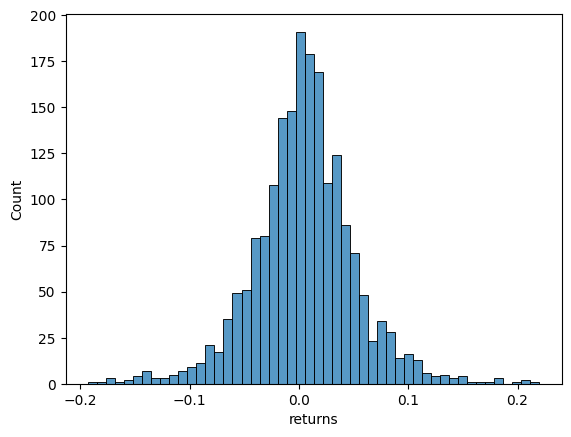

In [83]:
sns.histplot(np.log(final_df), x='returns')

/home/pedro/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


<Axes: xlabel='reported_RPS_Q0', ylabel='adjusted_close'>

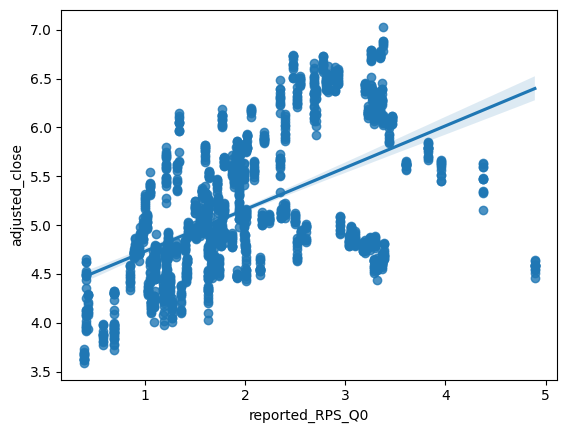

In [90]:
sns.regplot(np.log(final_df).reset_index(), y='adjusted_close', x='reported_RPS_Q0')

/home/pedro/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='reported_RPS_Q0', ylabel='adjusted_close'>

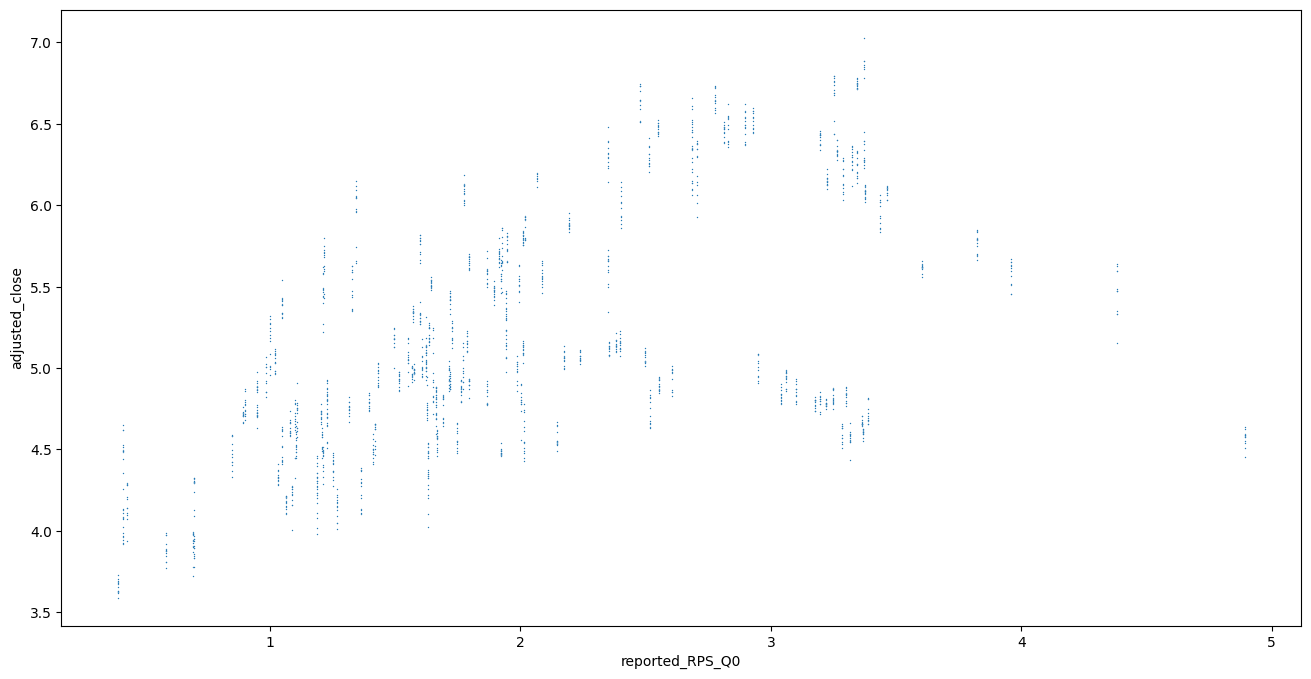

In [78]:
fig, ax = plt.subplots(figsize=(16,8))
data = final_df.reset_index()
data_x = np.log(data.reported_RPS_Q0)
data_y = np.log(data.adjusted_close)
sns.scatterplot(x=data_x, y=data_y, ax=ax, s=1, alpha=1)
#ax.plot(x=final_df.loc['AAPL'].index, y=final_df.loc['AAPL'])

In [79]:
import statsmodels.formula.api as smf

coefficients = ' + '.join([f'reported_RPS_Q{i} + cost_Margin_Q{i}' for i in range(2)])
reg = smf.ols(f'adjusted_close ~ {coefficients}', np.log(final_df)).fit()
reg.summary()

/home/pedro/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         adjusted_close   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     473.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.44e-280
Time:                        18:54:08   Log-Likelihood:                -1339.4
No. Observations:                1836   AIC:                             2689.
Df Residuals:                    1831   BIC:                             2716.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.2933      0.047     69.363      0.000       3.200       3.386
reported_RPS_Q0     0.6176      0.015     42.452      0.000       0.589       0.646
cost_Margin_Q0     -2.1596      0.085    -25.383      0.000      -2.326      -1.993
reported_RPS_Q1    -0.2779      0.031     -8.918      0.000      -0.339      -0.217
cost_Margin_Q1      0.8561      0.103      8.295      0.000       0.654       1.059
==============================================================================
Omnibus:                       22.067   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.532
Skew:                          -0.266   Prob(JB):                     1.28e-05
Kurtosis:                       3.102   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""